![Imgur](https://i.imgur.com/h4PPC71.png)
#**18-modul. Amaliyot. Customer Churn**
# 18.6. Modul boʻyicha yakuniy amaliy vazifa

**Bu vazifa orqali data sayns jarayoni:**

✔️ maʼlumot tayyorlash;

  ✔️ model qurish;

  ✔️ baholash;

  ✔️ natijalarni tahlil qilish
  kabi koʻnikmalarga ega boʻlasiz.

#**Vazifa: bank mijozlarining noroziligini bashorat qilish**

**Vazifa tavsifi**

Sizga bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

**Maʼlumotlar toʻplami**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

- mijoz identifikatori (RowNumber, CustomerId, Surname);
- geografik joylashuvi (Geography);
- jinsi (Gender);
- yoshi (Age);
- kredit balli (CreditScore);
- yillik daromadi (EstimatedSalary);
- bankda qancha vaqtdan beri mijoz ekani (Tenure);
- qancha mahsulotdan foydalanishi (NumOfProducts);
- faoliyati (HasCrCard, IsActiveMember);
- balans (Balance);
- prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

**Topshiriqlar**

1. **Maʼlumotlarni tahlil qilish va tozalash:**
   - Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
   - Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida).

2. **Maʼlumotlarni boʻlish:**
   - Maʼlumotlarni training va test toʻplamlariga ajrating (masalan, 80% training, 20% test).

3. **Model qurish:**
   - Quyidagi algoritmlar yordamida modellarni yarating:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Decision Tree
     - Random Forest
     - XGBoost

4. **Modellarni baholash:**
   - Har bir model uchun quyidagi koʻrsatkichlarni hisoblang:
     - Aniqlik (Accuracy)
     - Toʻgʻrilik (Precision)
     - Recall
     - F1-score

5. **Natijalarni tahlil qilish:**
   - Olingan natijalarni solishtiring va qaysi model eng yaxshi ishlashini aniqlang.
   - Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar bering.
---

###*** ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [1081]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

In [1082]:
url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


1. Maʼlumotlarni tahlil qilish va tozalash

In [1083]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  str    
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  str    
 4   Gender           10000 non-null  str    
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), str(3)
memory usage: 1.2 MB


In [1084]:
df.isna().sum()     # bo'sh qiymatlar yo'q

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [1085]:
df.duplicated().sum()

np.int64(0)

In [1086]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Ushbu datasetda anomal qiymatlar yo'q deb xulosa qildim:

- Yillik ish haqi Yevropa sharoitida 200k bo'lishi normal

- Inson yoshi 92 bo'lishi mumkin

- Bank hisobi 0 bo'lgan mijozlarning uchdan birini tashkil qiladi, boshqa banklarda hisobi bo'lishi yoki yangi mijoz bo'lishi mumkin

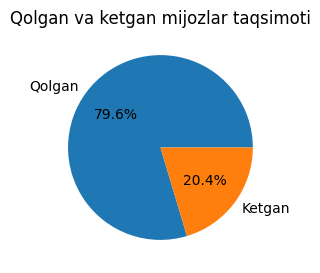

In [1087]:
churn_rate = df['Exited'].value_counts() / len(df) * 100

plt.figure(figsize=(3,3))
plt.pie(churn_rate, labels = ['Qolgan', 'Ketgan'], autopct='%1.1f%%')
plt.title('Qolgan va ketgan mijozlar taqsimoti')
plt.show()

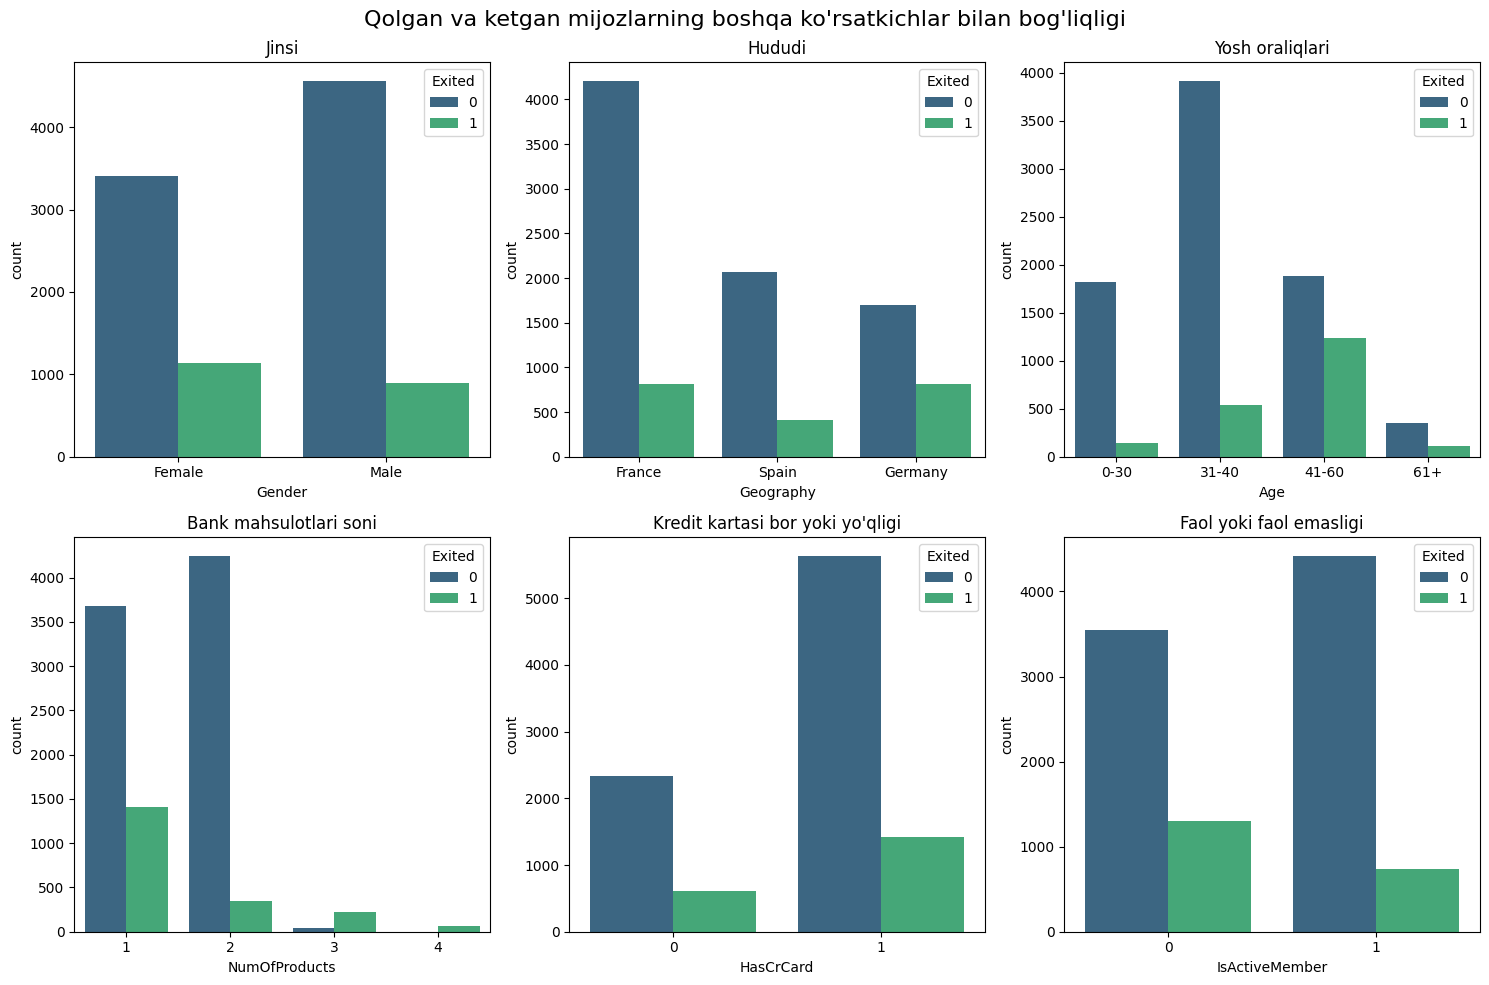

In [1088]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
fig.suptitle("Qolgan va ketgan mijozlarning boshqa ko'rsatkichlar bilan bog'liqligi", fontsize=16)

sns.countplot(x='Gender', hue='Exited', palette='viridis', data=df, ax=axes[0,0])
axes[0,0].set_title("Jinsi")

sns.countplot(x='Geography', hue='Exited', palette='viridis', data=df, ax=axes[0,1])
axes[0,1].set_title("Hududi")

bins=[0, 30, 40, 60, 120]
labels = ["0-30", "31-40", "41-60", "61+"]
sns.countplot(x=pd.cut(df['Age'], bins=bins, labels=labels, right=True), hue='Exited', palette='viridis', data=df, ax=axes[0,2])
axes[0,2].set_title("Yosh oraliqlari")

sns.countplot(x='NumOfProducts', hue='Exited', palette='viridis', data=df, ax=axes[1,0])
axes[1,0].set_title("Bank mahsulotlari soni")

sns.countplot(x='HasCrCard', hue='Exited', palette='viridis', data=df, ax=axes[1,1])
axes[1,1].set_title("Kredit kartasi bor yoki yo'qligi")

sns.countplot(x='IsActiveMember', hue='Exited', palette='viridis', data=df, ax=axes[1,2])
axes[1,2].set_title("Faol yoki faol emasligi")

plt.tight_layout()
plt.show()

Yuqoridagi grafikka ko'ra quyidagi toifadagi mijozlar ketishga ko'proq moyil:
- jinsi bo'yicha ayollar
- Germaniyalik mijozlar
- 40-60 yosh orasidagilar
- 1, 3, 4 ta bank mahsulotiga ega mijozlar
- faol mijoz bo'lmaganlar

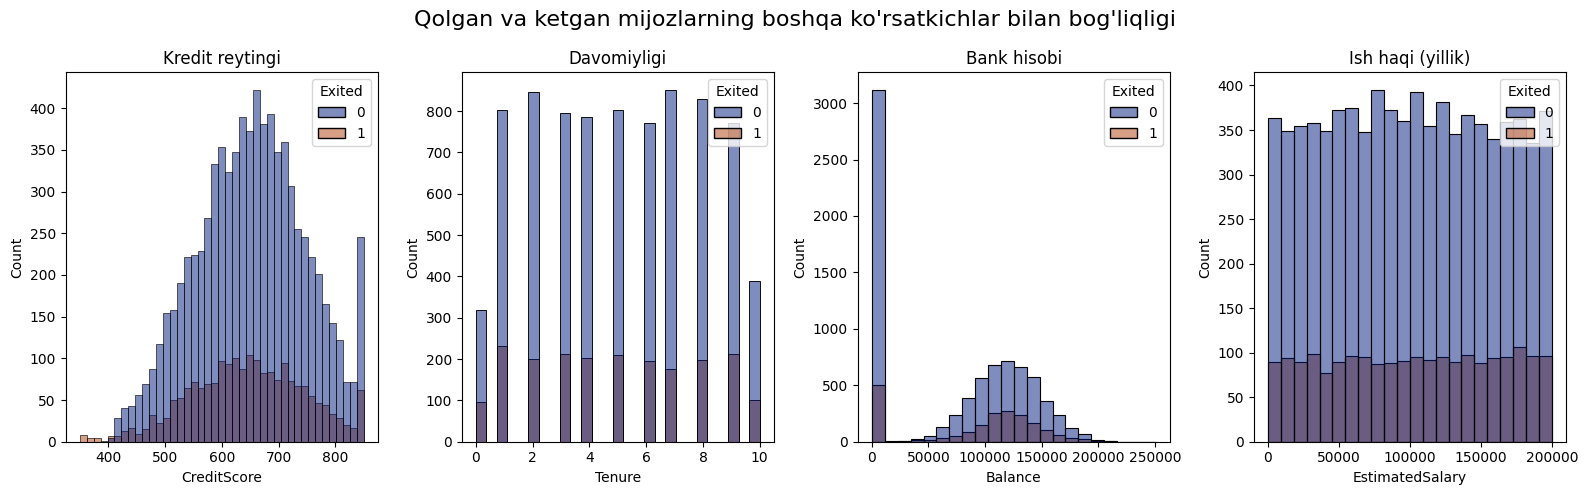

In [1089]:
fig, ax = plt.subplots(1, 4, figsize=(16,5))
fig.suptitle("Qolgan va ketgan mijozlarning boshqa ko'rsatkichlar bilan bog'liqligi", fontsize=16)

sns.histplot(x='CreditScore', hue='Exited', palette='dark', data=df, ax=ax[0])
ax[0].set_title("Kredit reytingi")

sns.histplot(x='Tenure', hue='Exited', palette='dark', data=df, ax=ax[1])
ax[1].set_title("Davomiyligi")

sns.histplot(x='Balance', hue='Exited', palette='dark', data=df, ax=ax[2])
ax[2].set_title("Bank hisobi")

sns.histplot(x='EstimatedSalary', hue='Exited', palette='dark', data=df, ax=ax[3])
ax[3].set_title("Ish haqi (yillik)")

plt.tight_layout()
plt.show()

2. Maʼlumotlarni boʻlish

In [1090]:
X = df.drop('Exited', axis=1)
y = df['Exited'].copy()

In [1091]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Model qurish
4. Modellarni baholash

# `dt`

In [1092]:
def feature_transformer(x):

    x["AgeGroup"] = pd.cut(x["Age"], [0, 30, 40, 50, 60, 120], labels=[1,2,3,4,5])

    x["CreditScoreGroup"] = pd.cut(x["CreditScore"], [0, 500, 600, 700, 800, 1000], labels=[1,2,3,4,5])

    x["SalaryGroup"] = pd.qcut(x["EstimatedSalary"], q=5, labels=[1,2,3,4,5])
    
    x["BalanceGroup"] = pd.cut(x["Balance"], [-1, 0, 20_000, 50_000, 100_000, 150_000, 500_000], labels=[0,1,2,3,4,5])

    x["Female"] = (x["Gender"] == "Female").astype(int)


    x['NotTwoProduct'] = (x["NumOfProducts"] != 2).astype(int)

    x["Age_41_60"] = (x['Age'].between(41, 60)).astype(int)

    x["ZeroBalance"] = (x["Balance"] == 0).astype(int)

    return x.drop(columns=['CustomerId', 'Surname', "Age", "CreditScore", "EstimatedSalary", "Balance", 'Gender'])


cat_attribs = ['Geography']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)
],
remainder='passthrough'            # remaining 'Tenure', 'NumOfProduct', 'HasCrCard', 'IsActiveMember' and new features are untouchedly passed to pipeline
)


In [1093]:
dt_pipeline = Pipeline([
    ('transformer', FunctionTransformer(feature_transformer)),
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(max_depth=6,
    min_samples_leaf=20,
    min_samples_split=10,
    class_weight="balanced",
    criterion="gini",
    random_state=42))
])

dt_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformer', ...), ('preprocessor', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<function fea...002408D7EBA60>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword argumen

In [1094]:
y_pred = dt_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"{accuracy=}\n{precision=}\n{recall=}\n{f1=}")

accuracy=0.793
precision=0.4824120603015075
recall=0.732824427480916
f1=0.5818181818181818


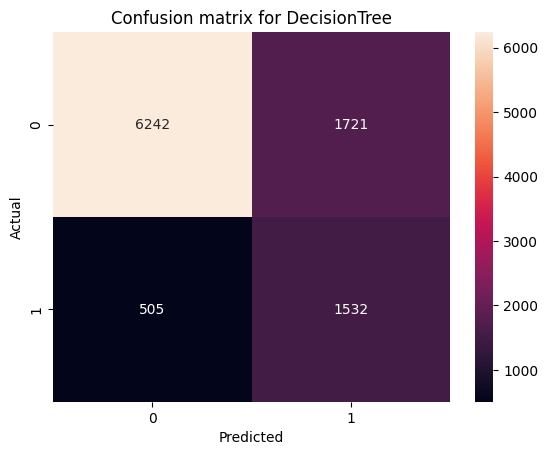

In [1095]:
predict = cross_val_predict(dt_pipeline, X, y, cv = 5)

dt_cm = confusion_matrix(y, predict)

sns.heatmap(dt_cm, fmt='d', annot=True)
plt.title('Confusion matrix for DecisionTree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1096]:
dt_accuracy = accuracy_score(y, predict)
dt_precision = precision_score(y, predict)
dt_recall = recall_score(y, predict)
dt_f1 = f1_score(y, predict)

print(f"{dt_accuracy=}\n{dt_precision=}\n{dt_recall=}\n{dt_f1=}")

dt_accuracy=0.7774
dt_precision=0.4709498924070089
dt_recall=0.7520864015709376
dt_f1=0.5792060491493384


# `rf`

In [1097]:
rf_pipeline = Pipeline([
    ('transformer', FunctionTransformer(feature_transformer)),
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(class_weight='balanced', n_estimators=500, max_depth=10, min_samples_leaf=30, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformer', ...), ('preprocessor', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<function fea...002408D7EBA60>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword argumen

In [1098]:
y_pred = rf_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"{accuracy=}\n{precision=}\n{recall=}\n{f1=}")

accuracy=0.7705
precision=0.4518950437317784
recall=0.7888040712468194
f1=0.5746061167747915


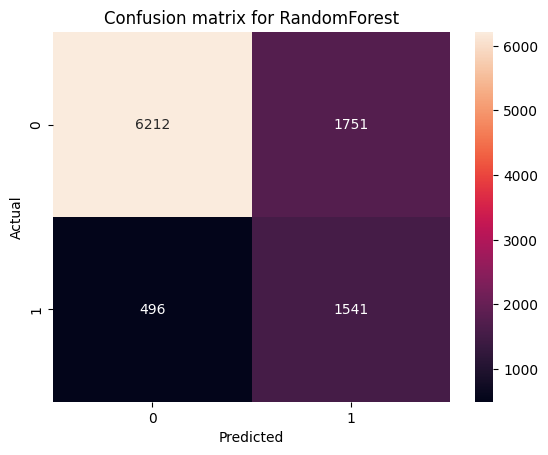

In [1099]:
predict = cross_val_predict(rf_pipeline, X, y, cv = 5)

rf_cm = confusion_matrix(y, predict)

sns.heatmap(rf_cm, fmt='d', annot=True)
plt.title('Confusion matrix for RandomForest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1100]:
rf_accuracy = accuracy_score(y, predict)
rf_precision = precision_score(y, predict)
rf_recall = recall_score(y, predict)
rf_f1 = f1_score(y, predict)

print(f"{rf_accuracy=}\n{rf_precision=}\n{rf_recall=}\n{rf_f1=}")

rf_accuracy=0.7753
rf_precision=0.4681044957472661
rf_recall=0.7565046637211585
rf_f1=0.5783449052355039


# `xgb`

In [1101]:
xgb_pipeline = Pipeline([
    ('transformer', FunctionTransformer(feature_transformer)),
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(    
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    objective="binary:logistic",
    eval_metric="logloss",
    max_depth=4,
    min_child_weight=10,
    gamma=1,
    subsample=0.8,
    colsample_bytree=0.8,
    learning_rate=0.05,
    n_estimators=500,
    random_state=42))
])

xgb_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformer', ...), ('preprocessor', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<function fea...002408D7EBA60>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword argumen

In [1102]:
y_pred = xgb_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"{accuracy=}\n{precision=}\n{recall=}\n{f1=}")

accuracy=0.7955
precision=0.4866666666666667
recall=0.7430025445292621
f1=0.5881168177240684


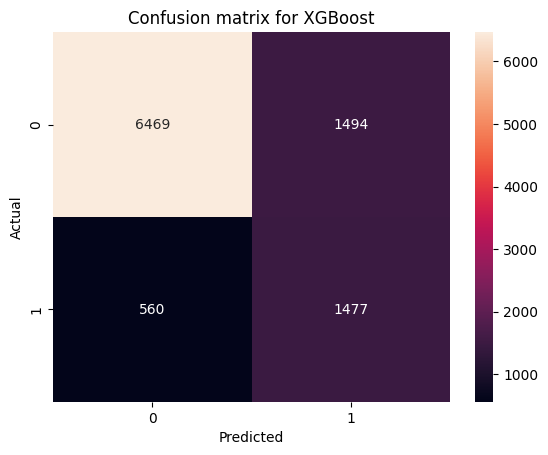

In [1103]:
predict = cross_val_predict(xgb_pipeline, X, y, cv = 5)

xgb_cm = confusion_matrix(y, predict)

sns.heatmap(xgb_cm, fmt='d', annot=True)
plt.title('Confusion matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1104]:
xgb_accuracy = accuracy_score(y, predict)
xgb_precision = precision_score(y, predict)
xgb_recall = recall_score(y, predict)
xgb_f1 = f1_score(y, predict)

print(f"{xgb_accuracy=}\n{xgb_precision=}\n{xgb_recall=}\n{xgb_f1=}")

xgb_accuracy=0.7946
xgb_precision=0.4971390104341972
xgb_recall=0.7250859106529209
xgb_f1=0.5898562300319489


# `lr`

In [1105]:
def feature_transformer_linear(x):

    x["ZeroBalance"] = (x["Balance"] == 0).astype(int)

    x["Female"] = (x["Gender"] == "Female").astype(int)

    return x.drop(columns=['CustomerId', 'Surname', 'Gender', "EstimatedSalary", 'Balance'])


cat_attribs = ['Geography']
num_attribs = ["Age", "CreditScore", "Tenure", 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'ZeroBalance', 'Female']

preprocessor_linear = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ('num', StandardScaler(), num_attribs)
])


In [1106]:
lr_pipeline = Pipeline([
    ('transformer_linear', FunctionTransformer(feature_transformer_linear)),
    ('preprocessor_linear', preprocessor_linear),
    ('lr', LogisticRegression(max_iter=500, class_weight='balanced'))
])

lr_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformer_linear', ...), ('preprocessor_linear', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<function fea...002408AC1D3A0>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional k

In [1107]:
y_pred = lr_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"{accuracy=}\n{precision=}\n{recall=}\n{f1=}")

accuracy=0.721
precision=0.38589211618257263
recall=0.7099236641221374
f1=0.5


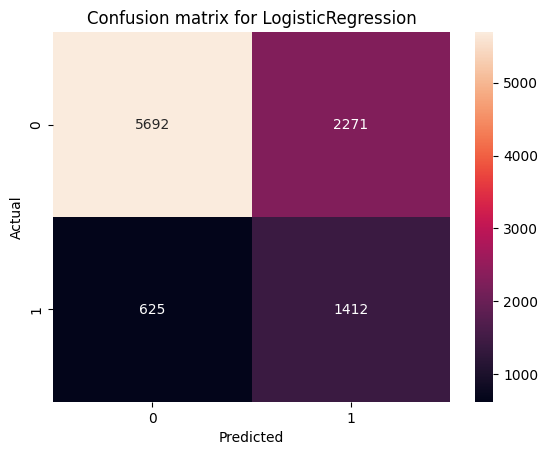

In [1108]:
predict = cross_val_predict(lr_pipeline, X, y, cv = 5)

lr_cm = confusion_matrix(y, predict)

sns.heatmap(lr_cm, fmt='d', annot=True)
plt.title('Confusion matrix for LogisticRegression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1109]:
lr_accuracy = accuracy_score(y, predict)
lr_precision = precision_score(y, predict)
lr_recall = recall_score(y, predict)
lr_f1 = f1_score(y, predict)

print(f"{lr_accuracy=}\n{lr_precision=}\n{lr_recall=}\n{lr_f1=}")

lr_accuracy=0.7104
lr_precision=0.3833831115938094
lr_recall=0.6931762395679921
lr_f1=0.4937062937062937


# `svm`

In [1110]:
svm_pipeline = Pipeline([
    ('transformer_linear', FunctionTransformer(feature_transformer_linear)),
    ('preprocessor_linear', preprocessor_linear),
    ('svm', SVC(class_weight='balanced'))
])

svm_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformer_linear', ...), ('preprocessor_linear', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<function fea...002408AC1D3A0>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional k

In [1111]:
y_pred = svm_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"{accuracy=}\n{precision=}\n{recall=}\n{f1=}")

accuracy=0.7755
precision=0.45692307692307693
recall=0.7557251908396947
f1=0.5695110258868649


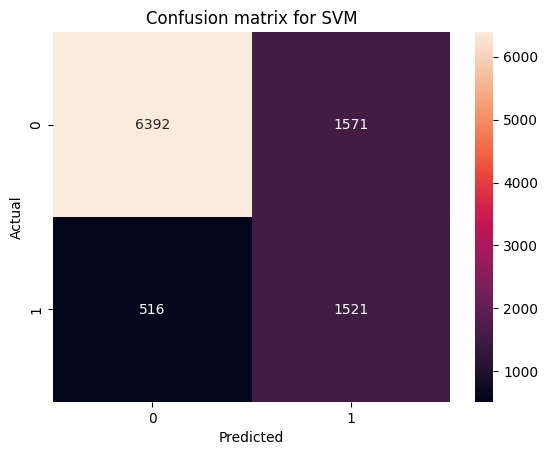

In [1112]:
predict = cross_val_predict(svm_pipeline, X, y, cv = 5)

svm_cm = confusion_matrix(y, predict)

sns.heatmap(svm_cm, fmt='d', annot=True)
plt.title('Confusion matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [1113]:
svm_accuracy = accuracy_score(y, predict)
svm_precision = precision_score(y, predict)
svm_recall = recall_score(y, predict)
svm_f1 = f1_score(y, predict)

print(f"{svm_accuracy=}\n{svm_precision=}\n{svm_recall=}\n{svm_f1=}")

svm_accuracy=0.7913
svm_precision=0.49191461836998707
svm_recall=0.7466863033873343
svm_f1=0.5930980697991811


5. Natijalarni tahlil qilish

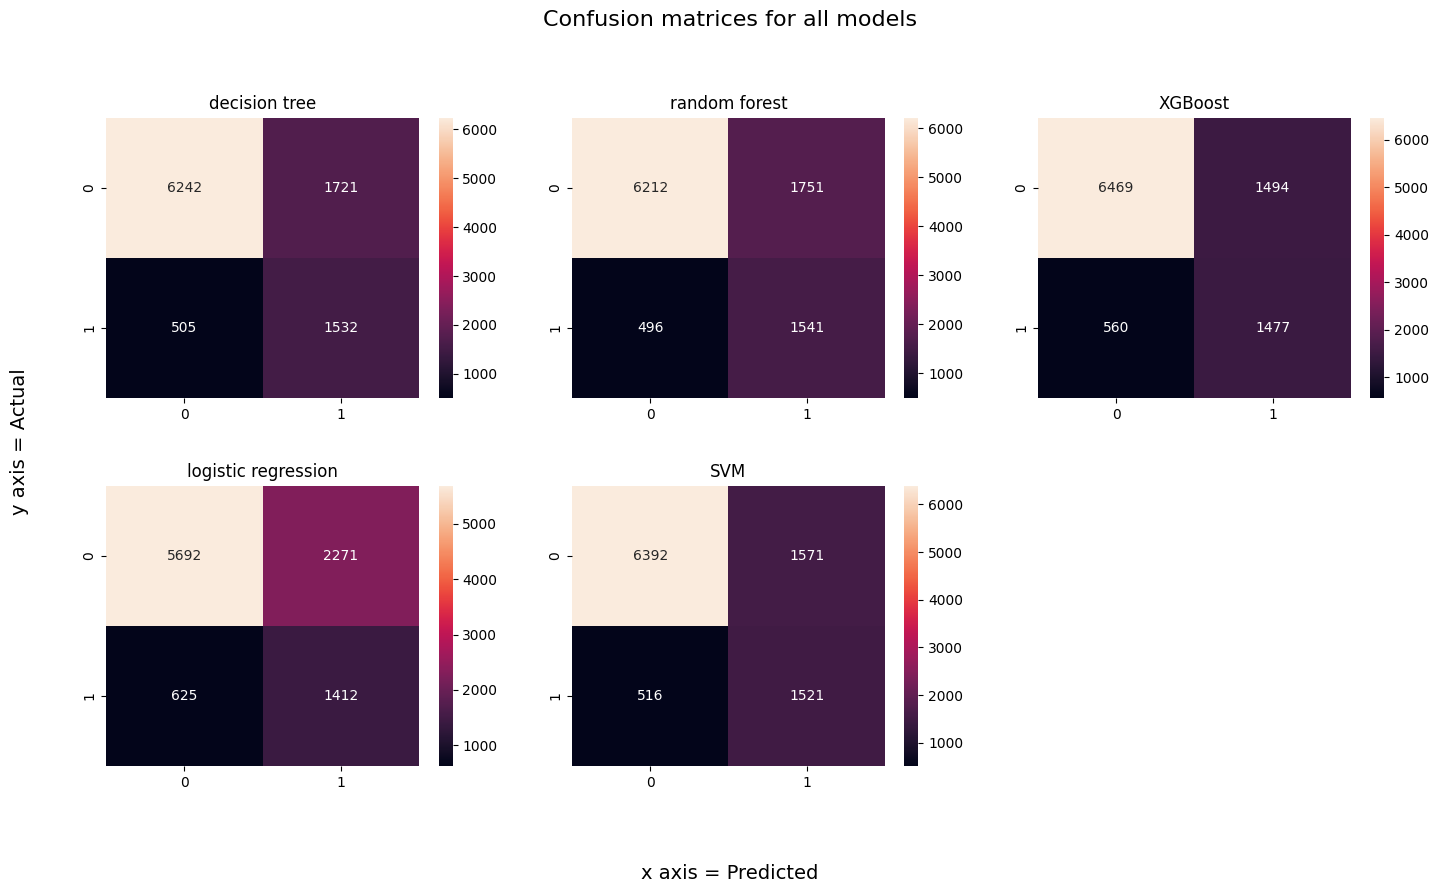

In [1114]:
fig, ax = plt.subplots(2, 3, figsize=(15, 9))
fig.suptitle("Confusion matrices for all models", fontsize=16)
fig.supxlabel("x axis = Predicted", fontsize=14)
fig.supylabel("y axis = Actual", fontsize=14)


sns.heatmap(dt_cm, ax=ax[0,0], fmt='d', annot=True)
ax[0,0].set_title('decision tree')

sns.heatmap(rf_cm, ax=ax[0,1], fmt='d', annot=True)
ax[0,1].set_title('random forest')

sns.heatmap(xgb_cm, ax=ax[0,2], fmt='d', annot=True)
ax[0,2].set_title('XGBoost')

sns.heatmap(lr_cm, ax=ax[1,0], fmt='d', annot=True)
ax[1,0].set_title('logistic regression')

sns.heatmap(svm_cm, ax=ax[1,1], fmt='d', annot=True)
ax[1,1].set_title('SVM')

ax[1, 2].axis("off")

fig.tight_layout(pad=3.0)
plt.show()

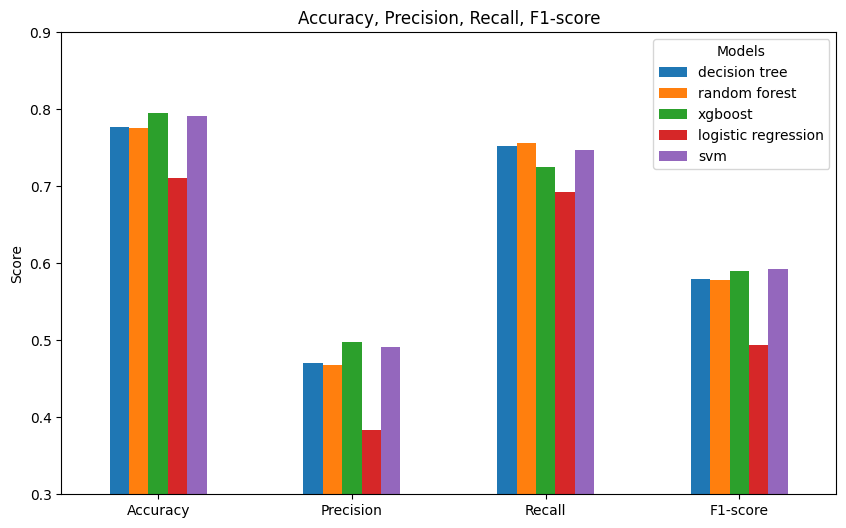

In [1115]:
scores = pd.DataFrame({
    'decision tree': [dt_accuracy, dt_precision, dt_recall, dt_f1],
    'random forest': [rf_accuracy, rf_precision, rf_recall, rf_f1],
    'xgboost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1],
    'logistic regression': [lr_accuracy, lr_precision, lr_recall, lr_f1],
    'svm': [svm_accuracy, svm_precision, svm_recall, svm_f1]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-score'])

ax = scores.plot(kind='bar', figsize=(10,6), rot=0)
ax.set_ylabel('Score')
ax.set_ylim(0.3, 0.9)
ax.set_title('Accuracy, Precision, Recall, F1-score')
plt.legend(title='Models')
plt.show()

Eng yaxshi model
`Random Forest` **recall** bo'yicha eng yaxshi natija berdi.

Dataset bo'yicha xulosalar

Datasetda class lar nomutanosib taqsimlangan: 80% churn qilmagan, 20% esa churn qilgan. Shu sababli, modellarda precision va recall o‘rtasida sezilarli trade-off kuzatiladi.

Agar modellarda class_weight='balanced' ishlatilmasa, model non-churn classga moslashadi. Natijada precision yuqori (~0.7) bo‘lsa-da, recall past (~0.45) bo‘ladi, ya’ni churn qilgan mijozlarning katta qismi aniqlanmay qoladi.

Aksincha, class_weight='balanced' qo‘llanganda, churn sinfiga ko‘proq e’tibor beriladi. Bu recall ni oshiradi (~0.7), ya’ni churn qilgan mijozlarning ko'pi aniqlanadi, biroq precision pasayadi (~0.45), chunki model churn bo‘lmagan ayrim mijozlarni ham churn deb belgilaydi.

Agar ma’lumotlar to‘plami muvozanatli bo‘lganida, modellardan ham precision, ham recall bo‘yicha 0.6–0.7 oralig‘idagi natijalarni kutish mumkin edi. Ammo mavjud nomutanosiblik sharoitida bunday natijaga erishish qiyin.

Ushbu tadqiqotning asosiy maqsadi churn qilishi mumkin bo‘lgan mijozlarni aniqlash bo‘lgani sababli, class_weight='balanced' ishlatildi. Chunki amaliy jihatdan churn qiladigan mijozni o‘tkazib yuborish (false negative) churn bo‘lmagan mijozni noto‘g‘ri belgilashdan (false positive) ko‘ra ko‘proq zarar keltiradi.



Bankka taklif

Bank quyidagi toifadagi mijozlarni ushlab qolishga ko'proq e'tibor qaratishi lozim, chunki ular ketishga ko'proq moyil:
- jinsi bo'yicha ayollar
- Germaniyalik mijozlar
- 40-60 yosh orasidagilar
- 1, 3, 4 ta bank mahsulotiga ega mijozlar
- faol mijoz bo'lmaganlar